In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import statistics as stats
import re

In [2]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios-BHRP.csv')
df_1 = df_1[(df_1['Ano'] == 2019)]
df_1.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Valor adicionado bruto da Indústria a preços correntes (R$ 1.000),Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000),"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)",Valor adicionado bruto total a preços correntes (R$ 1.000),"Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)",Produto Interno Bruto a preços correntes (R$ 1.000),Produto Interno Bruto per capita a preços correntes (R$ 1.000),Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto
17,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,"63,197","51,778","49,607","181,944","6,005","187,949","24,361.53",Indústrias extrativas,"Administração, defesa, educação e saúde públic...",Demais serviços
35,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,"11,537,468","9,924,629","2,212,077","23,687,150","4,379,098","28,066,248","63,882.75",Indústrias de transformação,Demais serviços,Comércio e reparação de veículos automotores e...
53,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,"9,781","41,414","30,739","96,526","5,797","102,323","14,898.51",Demais serviços,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a..."
71,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,"1,041,129","982,042","255,486","2,300,665","215,568","2,516,233","62,744.25",Demais serviços,Indústrias extrativas,"Administração, defesa, educação e saúde públic..."
89,2019,3,Sudeste,31,MG,Minas Gerais,3109600,Cachoeira da Prata,NaN,3107,...,"2,273","18,942","19,154","41,662","5,085","46,748","12,974.72","Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [95]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [4]:
#Dataset IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [5]:
#dataset IBGE

df_4 = pd.read_csv('IBGE-municipios.csv')
df_4.head()

,Nome do Município,População estimada(2021),População censo(2010),Densidade demografica(2010),Salario medio mensal(2019),Pessoal ocupado(2019),Populacao ocupada(2019),Percentual da populacao com renda de ate meio salario(2010),Taxa escolarizacao 6 a 14 anos(2010),IDEB anos finais ensino fundamental(2019),...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,7723,7536,20.59,1.8,1247,16.2,38.5,97.1,6.3,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,450024,378089,1102.80,3.2,118718,27.0,33.7,98.0,6.1,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6852,6818,22.59,1.6,770,11.2,36.8,98.5,5.6,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,41208,33973,53.13,2.2,12330,30.7,33.5,98.4,6.7,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Cachoeira da Prata,3580,3654,59.53,1.6,632,17.5,31.2,98.1,6.2,...,15260.12,12455.95,25.00,NaN,2,61.381,92.6,28.6,7.2,Cerrado


In [97]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
#df = pd.merge(df, df_4, how='inner', on="Nome do Município")
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,859,0,99,0,904,24,0.655,0.672,0.814,0.514
1,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,586,0,57,3,637,4,0.749,0.709,0.864,0.687
2,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,1650,0,413,29,1507,30,0.637,0.669,0.834,0.464
3,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,1025,1,191,23,949,31,0.747,0.761,0.857,0.639
4,2019,3,Sudeste,31,MG,Minas Gerais,3114907,Casa Grande,NaN,3107,...,776,0,117,30,692,5,0.652,0.608,0.823,0.555


In [98]:
df.head()

,Ano,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,...,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,2019,3,Sudeste,31,MG,Minas Gerais,3106408,Belo Vale,Região Metropolitana de Belo Horizonte,3107,...,859,0,99,0,904,24,0.655,0.672,0.814,0.514
1,2019,3,Sudeste,31,MG,Minas Gerais,3106705,Betim,Região Metropolitana de Belo Horizonte,3107,...,586,0,57,3,637,4,0.749,0.709,0.864,0.687
2,2019,3,Sudeste,31,MG,Minas Gerais,3108107,Bonfim,Região Metropolitana de Belo Horizonte,3107,...,1650,0,413,29,1507,30,0.637,0.669,0.834,0.464
3,2019,3,Sudeste,31,MG,Minas Gerais,3109006,Brumadinho,Região Metropolitana de Belo Horizonte,3107,...,1025,1,191,23,949,31,0.747,0.761,0.857,0.639
4,2019,3,Sudeste,31,MG,Minas Gerais,3114907,Casa Grande,NaN,3107,...,776,0,117,30,692,5,0.652,0.608,0.823,0.555


In [99]:
#Tratamento dos dados categóricos do PIB do municipio

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
regiao_metropolitana = le.fit(df_1['Região Metropolitana'])
regiao_metropolitana = le.transform(df_1['Região Metropolitana'])
#print(regiao_metropolitana)

le = preprocessing.LabelEncoder()
hierarquia_urbana = le.fit(df_1['Hierarquia Urbana (principais categorias)'])
hierarquia_urbana = le.transform(df_1['Hierarquia Urbana (principais categorias)'])
#print(hierarquia_urbana)

le = preprocessing.LabelEncoder()
mesorregiao = le.fit(df_1['Nome da Mesorregião'])
mesorregiao = le.transform(df_1['Nome da Mesorregião'])
#print(mesorregiao)

le = preprocessing.LabelEncoder()
microrregiao = le.fit(df_1['Nome da Microrregião'])
microrregiao = le.transform(df_1['Nome da Microrregião'])
#print(microrregiao)

le = preprocessing.LabelEncoder()
regiao_geografica_imediata = le.fit(df_1['Nome da Região Geográfica Imediata'])
regiao_geografica_imediata = le.transform(df_1['Nome da Região Geográfica Imediata'])
#print(regiao_geografica_imediata)

le = preprocessing.LabelEncoder()
regiao_geografica_intermediaria = le.fit(df_1['Nome da Região Geográfica Intermediária'])
regiao_geografica_intermediaria = le.transform(df_1['Nome da Região Geográfica Intermediária'])
#print(regiao_geografica_intermediaria)

le = preprocessing.LabelEncoder()
concentracao_urbana = le.fit(df_1['Nome Concentração Urbana'])
concentracao_urbana = le.transform(df_1['Nome Concentração Urbana'])
#print(concentracao_urbana)

le = preprocessing.LabelEncoder()
tipo_concentracao_urbana = le.fit(df_1['Tipo Concentração Urbana'])
tipo_concentracao_urbana = le.transform(df_1['Tipo Concentração Urbana'])
#print(tipo_concentracao_urbana)

le = preprocessing.LabelEncoder()
arranjo_populacional = le.fit(df_1['Nome Arranjo Populacional'])
arranjo_populacional = le.transform(df_1['Nome Arranjo Populacional'])
#print(arranjo_populacional)

le = preprocessing.LabelEncoder()
regiao_rural = le.fit(df_1['Nome da Região Rural'])
regiao_rural = le.transform(df_1['Nome da Região Rural'])
#print(regiao_rural)

le = preprocessing.LabelEncoder()
regiao_rural_nucleo = le.fit(df_1['Região rural (segundo classificação do núcleo)'])
regiao_rural_nucleo = le.transform(df_1['Região rural (segundo classificação do núcleo)'])
#print(regiao_rural_nucleo)

le = preprocessing.LabelEncoder()
nome_municipio = le.fit(df_1['Nome do Município'])
nome_municipio = le.transform(df_1['Nome do Município'])
#print(nome_municipio)


In [100]:
#Tratamento dos dados numéricos do PIB do municipio

#Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)
agropecuaria = df_1['Valor adicionado bruto da Agropecuária a preços correntes(R$ 1.000)']
industria = df_1['Valor adicionado bruto da Indústria a preços correntes (R$ 1.000)']
servicos = df_1['Valor adicionado bruto dos Serviços a preços correntes - exceto Administração em defesa educação e saúde públicas e seguridade social (R$ 1.000)']

administracao = df_1['Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social a preços correntes (R$ 1.000)']
bruto_total = df_1['Valor adicionado bruto total a preços correntes (R$ 1.000)']
impostos = df_1['Impostos, líquidos de subsídios, sobre produtos a preços correntes (R$ 1.000)']
precos_correntes = df_1['Produto Interno Bruto a preços correntes (R$ 1.000)']
#per_capita = df_1['Produto Interno Bruto per capita a preços correntes (R$ 1.000)']

agropecuaria_f = []
industria_f = []
servicos_f = []
administracao_f = []
bruto_total_f = []
impostos_f = []
precos_correntes_f = []
#per_capita_f = []

for i in agropecuaria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    agropecuaria_f.append(float(i))

for i in industria:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    industria_f.append(float(i))

for i in servicos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    servicos_f.append(float(i))

for i in administracao:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    administracao_f.append(float(i))

for i in bruto_total:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    bruto_total_f.append(float(i))

for i in impostos:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    impostos_f.append(float(i))

for i in precos_correntes:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços em branco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    precos_correntes_f.append(float(i))

'''
for i in per_capita:
    #Expressão regex que remove a segunda vírgula
    i = re.sub('(,[^,]*),', r'\1', i)
    #Remove os espaços embranco e troca o ponto por vírgula
    i = i.replace(' ','').replace(',', '.')
    per_capita_f.append(float(i))
'''



"\nfor i in per_capita:\n    #Expressão regex que remove a segunda vírgula\n    i = re.sub('(,[^,]*),', r'\x01', i)\n    #Remove os espaços embranco e troca o ponto por vírgula\n    i = i.replace(' ','').replace(',', '.')\n    per_capita_f.append(float(i))\n"

In [101]:
#Tratamento dos dados numéricos do IDH dos Municipios

idh = df_3['IDH 2010']
idh_renda = df_3['IDHM Renda 2010']
idh_longevidade = df_3['IDHM Longevidade 2010']
idh_educacao = df_3['IDHM Educação 2010']

idh_f = []
idh_renda_f = []
idh_longevidade_f = []
idh_educacao_f = []

for i in idh:
    idh_f.append(float(i))

for i in idh_renda:
    idh_renda_f.append(float(i))

for i in idh_longevidade:
    idh_longevidade_f.append(float(i))
    
for i in idh_educacao:
    idh_educacao_f.append(float(i))


In [102]:
#Tratamento dos dados númericos do CAR

app = df_2['APP']
superior_1800 = df_2['Altitude Superior 1800']
consolidade = df_2['Consolidada']
declividade_maior_45 = df_2['Declividade Maior 45']
imoveis = df_2['Imoveis']
pousio = df_2['Pousio']
topo_morro = df_2['Topo de Morro']
banhado = df_2['Banhado']
borda_chapada = df_2['Borda Chapada']
hidrografia = df_2['Hidrografia']
manguezal = df_2['Manguezal']
nascentes = df_2['Nascentes']
reserva_legal = df_2['Reserva Legal']
restinga = df_2['Restinga']
servidao_administrativa = df_2['Servidão Administrativa']
restrito = df_2['Restrito']
vegetacao_nativa = df_2['Vegetação Nativa']
vereda = df_2['Vereda']
                           
app_f = []
superior_1800_f = []
consolidade_f = []
declividade_maior_45_f = []
imoveis_f = []
pousio_f = []
topo_morro_f = []
banhado_f = []
borda_chapada_f = []
hidrografia_f = []
manguezal_f = []
nascentes_f = []
reserva_legal_f = []
restinga_f = []
servidao_administrativa_f = []
restrito_f = []
vegetacao_nativa_f = []
vereda_f = []
                           
for i in app:
    app_f.append(float(i))

for i in superior_1800:
    superior_1800_f.append(float(i))
                           
for i in consolidade:
    consolidade_f.append(float(i))
                           
for i in declividade_maior_45:
    declividade_maior_45_f.append(float(i))
                           
for i in imoveis:
    imoveis_f.append(float(i))
                           
for i in pousio:
    pousio_f.append(float(i))
                           
for i in topo_morro:
    topo_morro_f.append(float(i))
                           
for i in banhado:
    banhado_f.append(float(i))
                           
for i in borda_chapada:
    borda_chapada_f.append(float(i))
                           
for i in hidrografia:
    hidrografia_f.append(float(i))
                           
for i in manguezal:
    manguezal_f.append(float(i))
                           
for i in nascentes:
    nascentes_f.append(float(i))
                           
for i in reserva_legal:
    reserva_legal_f.append(float(i))
                           
for i in restinga:
    restinga_f.append(float(i))
                           
for i in servidao_administrativa:
    servidao_administrativa_f.append(float(i))
                           
for i in restrito:
    restrito_f.append(float(i))
                           
for i in vegetacao_nativa:
    vegetacao_nativa_f.append(float(i))
                           
for i in vereda:
    vereda_f.append(float(i))

In [103]:
#Tratamento dos dados IBGE

populacao_estimada = df_4['População estimada(2021)']
populacao_censo = df_4['População censo(2010)']
densidade_demografica = df_4['Densidade demografica(2010)']
salario_medio = df_4['Salario medio mensal(2019)']
pessoal_ocupado = df_4['Pessoal ocupado(2019)']
populacao_ocupada = df_4['Populacao ocupada(2019)']
percentual_renda_meio_salario = df_4['Percentual da populacao com renda de ate meio salario(2010)']
taxa_escolarizacao = df_4['Taxa escolarizacao 6 a 14 anos(2010)']
IDEB_ensino_fundamental = df_4['IDEB anos finais ensino fundamental(2019)']
IDEB_ensino_medio = df_4['IDEB anos finais ensino fundamental(2019)']
docentes_ensino_fundamental = df_4['Docentes ensino fundamental(2020)']
docentes_ensino_medio = df_4['Docentes ensino medio(2020)']
numero_escolas_ensino_fundamental = df_4['Numeros estabelecimentos ensino fundamental(2010)']
numero_escolas_ensino_medio = df_4['Numeros estabelecimentos ensino medio(2020)']
pib = df_4['PIB per capita(2019)']
receitas_externas = df_4['Percentual receitas fontes externas(2015)']
IDHM = df_4['IDHM(2010)']
total_receitas_realizadas = df_4['Total receitas realizadas(2017)']
total_receitas_empenhadas = df_4['Total receitas empenhadas(2017)']
mortalidade_infantil = df_4['Mortalidade infantil(2019)']
internacoes_diarreias = df_4['Internacoes por diarreia(2016)']
SUS = df_4['Estabelecimentos SUS(2009)']
area = df_4['Area territorial(2021)']
esgotamento = df_4['Esgotamento adequado(2010)']
arborizacao = df_4['Arborização vias publicas(2010)']
urbanizacao = df_4['Urbanizacao vias publicas(2010)']
bioma = df_4['Bioma']

populacao_estimada_f = []
populacao_censo_f = []
densidade_demografica_f = []
salario_medio_f = []
pessoal_ocupado_f = []
populacao_ocupada_f = []
percentual_renda_meio_salario_f = []
taxa_escolarizacao_f = []
IDEB_ensino_fundamental_f = []
IDEB_ensino_medio_f = []
docentes_ensino_fundamental_f = []
docentes_ensino_medio_f = []
numero_escolas_ensino_fundamental_f = []
numero_escolas_ensino_medio_f = []
pib_f = []
receitas_externas_f = []
IDHM_f = []
total_receitas_realizadas_f = []
total_receitas_empenhadas_f = [] 
mortalidade_infantil_f = [] 
internacoes_diarreias_f = []
SUS_f = []
area_f = []
esgotamento_f = []
arborizacao_f = []
urbanizacao_f = []
bioma_f = [] 

for i in populacao_estimada:
    populacao_estimada_f.append(float(i))
    
for i in populacao_censo:
    populacao_censo_f.append(float(i))
    
for i in densidade_demografica:
    densidade_demografica_f.append(float(i))
    
for i in salario_medio:
    salario_medio_f.append(float(i))
    
for i in pessoal_ocupado:
    pessoal_ocupado_f.append(float(i))
    
for i in populacao_ocupada:
    populacao_ocupada_f.append(float(i))
    
for i in percentual_renda_meio_salario:
    percentual_renda_meio_salario_f.append(float(i))

for i in taxa_escolarizacao:
    taxa_escolarizacao_f.append(float(i))

for i in IDEB_ensino_fundamental:
    IDEB_ensino_fundamental_f.append(float(i))

for i in IDEB_ensino_medio:
    IDEB_ensino_medio_f.append(float(i))
    
for i in docentes_ensino_fundamental:
    docentes_ensino_fundamental_f.append(float(i))
    
for i in docentes_ensino_medio:
    docentes_ensino_medio_f.append(float(i))
    
for i in numero_escolas_ensino_fundamental:
    numero_escolas_ensino_fundamental_f.append(float(i))
    
for i in numero_escolas_ensino_medio:
    numero_escolas_ensino_medio_f.append(float(i))
    
for i in pib:
    pib_f.append(float(i))
    
for i in receitas_externas:
    receitas_externas_f.append(float(i))
    
for i in IDHM:
    IDHM_f.append(float(i))
    
for i in total_receitas_realizadas:
    total_receitas_realizadas_f .append(float(i))

for i in total_receitas_empenhadas:
    total_receitas_empenhadas_f.append(float(i))
    
for i in mortalidade_infantil:
    mortalidade_infantil_f.append(float(i))
    
for i in internacoes_diarreias:
    internacoes_diarreias_f.append(float(i))
    
for i in SUS:
    SUS_f.append(float(i))
    
for i in area:
    area_f.append(float(i))
    
for i in esgotamento:
    esgotamento_f.append(float(i))
    
for i in arborizacao:
    arborizacao_f.append(float(i))
    
for i in urbanizacao:
    urbanizacao_f.append(float(i))

le = preprocessing.LabelEncoder()
bioma_f = le.fit(df_4['Bioma'])
bioma_f = le.transform(df_4['Bioma'])


In [104]:
#aux = dimensão > 2
aux = []

for i in range(len(regiao_metropolitana)):
    t = []
    #PIB dos municipios
    t.append(nome_municipio[i])
    t.append(regiao_metropolitana[i])
    t.append(hierarquia_urbana[i])
    t.append(mesorregiao[i])
    t.append(microrregiao[i])
    t.append(regiao_geografica_imediata[i])
    t.append(regiao_geografica_intermediaria[i])
    t.append(concentracao_urbana[i])
    t.append(tipo_concentracao_urbana[i])
    t.append(arranjo_populacional[i])
    t.append(regiao_rural[i])
    t.append(regiao_rural_nucleo[i])
    t.append(agropecuaria_f[i])
    t.append(industria_f[i])
    t.append(servicos_f[i])
    t.append(administracao_f[i])
    t.append(bruto_total_f[i])
    t.append(impostos_f[i])
    t.append(precos_correntes_f[i])
    #CAR
    t.append(app_f [i])
    t.append(superior_1800_f[i])
    t.append(consolidade_f[i])
    t.append(declividade_maior_45_f[i])
    t.append(imoveis_f[i])
    t.append(pousio_f[i])
    t.append(topo_morro_f[i])
    t.append(banhado_f[i])
    t.append(borda_chapada_f[i])
    t.append(hidrografia_f[i])
    t.append(manguezal_f[i])
    t.append(nascentes_f[i])
    t.append(reserva_legal_f[i])
    t.append(restinga[i])
    t.append(servidao_administrativa_f[i])
    t.append(restrito_f[i])
    t.append(vegetacao_nativa[i])
    t.append(vereda[i])                        
    #IDH
    t.append(idh_f[i])
    t.append(idh_renda_f[i])
    t.append(idh_longevidade_f[i])
    t.append(idh_educacao_f[i])
    #IBGE
    '''
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    t.append()
    '''
    
    aux.append(t)


C:\Users\T.i\anaconda3-2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 556080639.3785539
2 210192169.15856335
3 115506964.10906158
4 93592060.96623614
5 58251968.47700036
6 37289095.9692723
7 33009292.845899206
8 32013550.26553818
9 29330234.314887293
10 25909193.52213974


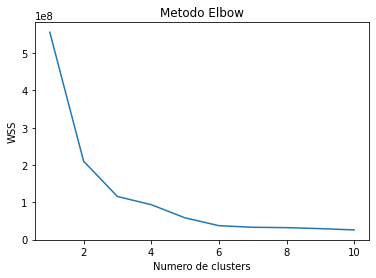

In [105]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(aux)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [106]:
#Silhouette Score
#Valor varia entre -1 e +1
#1: Clusters bem mais separados e com valores melhor definidos
#0: Distância entre os clusters formados não é significativa
#-1: Valores dos clusters errados

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores_silhouette_scores = []

for i in range(2,15):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit_predict(aux)
    score = silhouette_score(aux, km.labels_, metric='euclidean')
    
    x = []
    x.append(i)
    x.append(score)
    valores_silhouette_scores.append(x)

print(valores_silhouette_scores)

#Melhor valor encontrado = 4



[[2, 0.5572728373694774], [3, 0.5016551033724882], [4, 0.49867537870769074], [5, 0.4313086106651957], [6, 0.41112782081951965], [7, 0.4064731276836886], [8, 0.34272335399369913], [9, 0.346868057604085], [10, 0.31471454229151713], [11, 0.32036268445182253], [12, 0.2931916451535427], [13, 0.3226765060921619], [14, 0.3404258163949024]]


In [107]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)
cluster = kmeans.fit_predict(aux)

print(cluster)


[1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 1 1 1]


In [108]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[ 6.59053673e+02  8.30257198e+01]
 [-1.32799946e+03  4.51148140e+00]
 [ 2.77642936e+03  1.08813829e+03]
 [ 3.47162210e+03 -9.69766708e+02]
 [-3.90994198e+03 -2.13525082e+02]
 [-3.61843848e+03  3.08461677e+01]
 [-3.37676936e+02 -1.15258658e+02]
 [-1.34583361e+03 -4.79411019e+02]
 [ 1.62104410e+03 -1.43439754e+01]
 [-3.45647545e+03  1.73609141e+02]
 [-1.44712516e+03 -4.16318764e+02]
 [ 1.02776876e+03  3.56044459e+02]
 [ 4.99976478e+03  4.64419790e+02]
 [ 4.66496572e+03  6.39383199e+01]
 [ 6.59938069e+03 -6.10341079e+02]
 [ 4.84518353e+03  5.13546458e+02]
 [ 1.13062744e+02  2.88427551e+02]
 [-1.70145945e+03  6.81778152e+01]
 [-3.02219019e+03 -1.52170051e+02]
 [-3.99192519e+03 -4.28819609e+02]
 [-3.06743393e+03  3.50438106e+01]
 [-2.66002643e+03 -1.39666023e+02]
 [ 6.73492898e+01  2.77215922e+02]
 [ 2.26362257e+03  1.51578978e+03]
 [ 6.91893491e+02 -3.42459351e+01]
 [ 1.20210913e+03 -2.35195929e+02]
 [-3.70338510e+03 -3.26449276e+02]
 [ 3.69747988e+03  5.57591294e+02]
 [-2.59863060e+03 -9

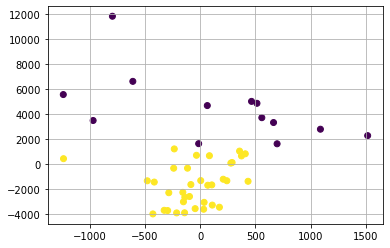

In [109]:
import matplotlib.pyplot as plt

plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
#plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s=70, c='red') #posicao do centroide do agrupamento
plt.show()

In [110]:
#Pegando os centroides de cada cluster
centroids = kmeans.cluster_centers_
print(len(centroids))

2


In [111]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({1: 35, 0: 13})


In [112]:
#Mostrar o nome das cidades por cluster

#Verificar se essa relação é correta
cidades = {
    '0':'Belo Vale',
    '1':'Betim',
    '2':'Bonfim',
    '3':'Brumadinho',
    '4':'Cachoeira da Prata',
    '5':'Caetanópolis',
    '6':'Casa Grande',
    '7':'Congonhas',
    '8':'Conselheiro Lafaiete',
    '9':'Contagem',
    '10':'Cristiano Otoni',
    '11':'Crucilândia',
    '12':'Curvelo',
    '13':'Desterro de Entre Rios',
    '14':'Entre Rios de Minas',
    '15':'Esmeraldas',
    '16':'Felixlândia',
    '17':'Florestal',
    '18':'Fortuna de Minas',
    '19':'Ibirité',
    '20':'Igarapé',
    '21':'Inhaúma',
    '22':'Itatiaiuçu',
    '23':'Itaúna',
    '24':'Itaverava',
    '25':'Jeceaba',
    '26':'Juatuba',
    '27':'Lagoa Dourada',
    '28':'Maravilhas',
    '29':'Mario Campos',
    '30':'Mateus Leme',
    '31':'Moeda',
    '32':'Ouro Branco',
    '33':'Ouro Preto',
    '34':'Papagaios',
    '35':'Pará de Minas',
    '36':'Paraopeba',
    '37':'Pequi',
    '38':'Piedade dos Gerais',
    '39':'Pompéu',
    '40':'Queluzito',
    '41':'Resende Costa',
    '42':'Rio Manso',
    '43':'São Brás do Suaçuí',
    '44':'São Joaquim de Bicas',
    '45':'São José da Varginha',
    '46':'Sarzedo',
    '47':'Sete Lagoas'
}

city = []
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
c4 = [] #Representa o cluster 4
c5 = [] #Representa o cluster 5
c6 = [] #Representa o cluster 6

j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

#Para cada id que representa uma cidade, eu adiciona no vetor "cidades"

for i in cidades:
    city.append(cidades[i])

#Para cada valor i do "cluster", tem-se o nome da cidade i
#Com isso, é feito um map do nome da cidade com cluster que ela pertence
for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    elif i == 4:
        c4.append(city[j])
    elif i == 5:
        c5.append(city[j])
    elif i == 6:
        c6.append(city[j])
    
    j = j + 1
    
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)



['Bonfim', 'Brumadinho', 'Conselheiro Lafaiete', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Itaúna', 'Lagoa Dourada', 'Ouro Preto', 'Pará de Minas', 'Pompéu', 'Resende Costa']
['Belo Vale', 'Betim', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Contagem', 'Cristiano Otoni', 'Crucilândia', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Ibirité', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaverava', 'Jeceaba', 'Juatuba', 'Maravilhas', 'Mario Campos', 'Mateus Leme', 'Moeda', 'Ouro Branco', 'Papagaios', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Queluzito', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo', 'Sete Lagoas']
[]
[]
[]
[]
[]


In [113]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset IDH
c0_idh = []
c0_renda = []
c0_longevidade = []

c1_idh = []
c1_renda = []
c1_longevidade = []

print("Cluster C0:")
for i in c0:
    x = df_3[(df_3['Nome do Município'] == i)]
    c0_idh.append(float(x['IDH 2010']))
    c0_renda.append(float(x['IDHM Renda 2010']))
    c0_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c0_idh))
print("Média IDH Renda: ",stats.mean(c0_renda))
print("Média IDH Longevidade: ",stats.mean(c0_longevidade))
print("Mediana IDH: ", stats.median(c0_idh))
print("Mediana IDH Renda: ",stats.median(c0_renda))
print("MedianaIDH Longevidade: ",stats.median(c0_longevidade))
print("Moda IDH: ", stats.mode(c0_idh))
print("Moda IDH Renda: ",stats.mode(c0_renda))
print("Moda IDH Longevidade: ",stats.mode(c0_longevidade))

print("\n")
print("Cluster C1:")
for i in c1:
    x = df_3[(df_3['Nome do Município'] == i)]
    c1_idh.append(float(x['IDH 2010']))
    c1_renda.append(float(x['IDHM Renda 2010']))
    c1_longevidade.append(float(x['IDHM Longevidade 2010']))

print("Média IDH: ", stats.mean(c1_idh))
print("Média IDH Renda: ",stats.mean(c1_renda))
print("Média IDH Longevidade: ",stats.mean(c1_longevidade))
print("Mediana IDH: ", stats.median(c1_idh))
print("Mediana IDH Renda: ",stats.median(c1_renda))
print("MedianaIDH Longevidade: ",stats.median(c1_longevidade))
print("Moda IDH: ", stats.mode(c1_idh))
print("Moda IDH Renda: ",stats.mode(c1_renda))
print("Moda IDH Longevidade: ",stats.mode(c1_longevidade))

Cluster C0:
Média IDH:  0.701076923076923
Média IDH Renda:  0.6941538461538461
Média IDH Longevidade:  0.8342307692307692
Mediana IDH:  0.689
Mediana IDH Renda:  0.689
MedianaIDH Longevidade:  0.834
Moda IDH:  0.637
Moda IDH Renda:  0.689
Moda IDH Longevidade:  0.834


Cluster C1:
Média IDH:  0.6915142857142857
Média IDH Renda:  0.6751428571428572
Média IDH Longevidade:  0.8342857142857143
Mediana IDH:  0.695
Mediana IDH Renda:  0.672
MedianaIDH Longevidade:  0.839
Moda IDH:  0.704
Moda IDH Renda:  0.651
Moda IDH Longevidade:  0.845


In [114]:
#Para cada um dos clusters formados, busca-se em cada um dos datasets os dados para análise
#Dataset CAR
import math

c0_app = []
c0_altitude_superior_1800 = []
c0_consolidada = []
c0_declividade = []
c0_imoveis = []
c0_pousio = []
c0_topo_morro = []
c0_banhado = []
c0_borda_chapada = []
c0_hidrografia = []
c0_manguezal = []
c0_nascentes = []
c0_reserva_legal = []
c0_restinga = []
c0_servidao_administrativa = []
c0_restrito = []
c0_vegetacao_nativa = []
c0_vereda = []

c1_app = []
c1_altitude_superior_1800 = []
c1_consolidada = []
c1_declividade = []
c1_imoveis = []
c1_pousio = []
c1_topo_morro = []
c1_banhado = []
c1_borda_chapada = []
c1_hidrografia = []
c1_manguezal = []
c1_nascentes = []
c1_reserva_legal = []
c1_restinga = []
c1_servidao_administrativa = []
c1_restrito = []
c1_vegetacao_nativa = []
c1_vereda = []

print("Cluster C0:")
for i in c0:
    x = df_2[(df_2['Nome do Município'] == i)]
    c0_app.append(int(x['APP']))
    c0_altitude_superior_1800.append(int(x['Altitude Superior 1800']))
    c0_consolidada.append(int(x['Consolidada']))
    c0_declividade.append(int(x['Declividade Maior 45']))
    c0_imoveis.append(int(x['Imoveis']))
    c0_pousio.append(int(x['Pousio']))
    c0_topo_morro.append(int(x['Topo de Morro']))
    c0_banhado.append(int(x['Banhado']))
    c0_borda_chapada.append(int(x['Borda Chapada']))
    c0_hidrografia.append(int(x['Hidrografia']))
    c0_manguezal.append(int(x['Manguezal']))
    c0_nascentes.append(int(x['Nascentes']))
    c0_reserva_legal.append(int(x['Reserva Legal']))
    c0_restinga.append(int(x['Restinga']))
    c0_servidao_administrativa.append(int(x['Servidão Administrativa']))
    c0_restrito.append(int(x['Restrito']))
    c0_vegetacao_nativa.append(int(x['Vegetação Nativa']))
    c0_vereda.append(int(x['Vereda']))

print("Média APP: ", math.ceil(stats.mean(c0_app)))
print("Média Altitude Superior 1800: ", math.ceil(stats.mean(c0_altitude_superior_1800)))
print("Média Consolidada: ", math.ceil(stats.mean(c0_consolidada)))
print("Média Declividade: ", math.ceil(stats.mean(c0_declividade)))
print("Média Imoveis: ", math.ceil(stats.mean(c0_imoveis)))
print("Média Pousio: ", math.ceil(stats.mean(c0_pousio)))
print("Média Topo Morro: ", math.ceil(stats.mean(c0_topo_morro)))
print("Média Banhado: ", math.ceil(stats.mean(c0_banhado)))
print("Média Borda Chapada: ", math.ceil(stats.mean(c0_borda_chapada)))
print("Média Hidrografia: ", math.ceil(stats.mean(c0_hidrografia)))
print("Média Nascentes: ", math.ceil(stats.mean(c0_nascentes)))
print("Média Reserva Legal: ", math.ceil(stats.mean(c0_reserva_legal)))
print("Média Restinga: ", math.ceil(stats.mean(c0_restinga)))
print("Média Servidão Administrativa: ", math.ceil(stats.mean(c0_servidao_administrativa
)))
print("Média Restrito: ", math.ceil(stats.mean(c0_restrito)))
print("Média Vegetação Nativa: ", math.ceil(stats.mean(c0_vegetacao_nativa)))
print("Média Vereda: ", math.ceil(stats.mean(c0_vereda)))

print("\n")
print("Cluster C1:")
for i in c1:
    x = df_2[(df_2['Nome do Município'] == i)]
    #c1_app.append(int(x['APP']))
    print(i)
    print(int(x['APP']))

Cluster C0:
Média APP:  7956
Média Altitude Superior 1800:  0
Média Consolidada:  1459
Média Declividade:  6
Média Imoveis:  1610
Média Pousio:  43
Média Topo Morro:  7
Média Banhado:  10
Média Borda Chapada:  1
Média Hidrografia:  1358
Média Nascentes:  609
Média Reserva Legal:  1617
Média Restinga:  5
Média Servidão Administrativa:  270
Média Restrito:  56
Média Vegetação Nativa:  1631
Média Vereda:  13


Cluster C1:
Belo Vale
4489
Betim
2664
Cachoeira da Prata


TypeError: cannot convert the series to <class 'int'>